### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk

%matplotlib inline

### Exploratory Analysis

In [2]:
df = pd.read_csv("data.csv", index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 863 entries, 0 to 862
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   location      863 non-null    int64  
 1   country       863 non-null    int64  
 2   gender        863 non-null    int64  
 3   age           863 non-null    float64
 4   vis_wuhan     863 non-null    int64  
 5   from_wuhan    863 non-null    int64  
 6   symptom1      863 non-null    int64  
 7   symptom2      863 non-null    int64  
 8   symptom3      863 non-null    int64  
 9   symptom4      863 non-null    int64  
 10  symptom5      863 non-null    int64  
 11  symptom6      863 non-null    int64  
 12  diff_sym_hos  863 non-null    int64  
 13  result        863 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 101.1 KB


The data doesn't have null or incomplete samples.

In [3]:
df.head()

,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
0,104,8,1,66.0,1,0,14,31,19,12,3,1,8,1
1,101,8,0,56.0,0,1,14,31,19,12,3,1,0,0
2,137,8,1,46.0,0,1,14,31,19,12,3,1,13,0
3,116,8,0,60.0,1,0,14,31,19,12,3,1,0,0
4,116,8,1,58.0,0,0,14,31,19,12,3,1,0,0


#### Quantitative properties.

In [4]:
quan_cols = ["age", "diff_sym_hos"]
df[quan_cols].describe()

,age,diff_sym_hos
count,863.000000,863.000000
mean,49.400000,0.995365
std,15.079203,2.358767
min,2.000000,-5.000000
25%,40.000000,0.000000
50%,49.400000,0.000000
75%,57.000000,1.000000
max,96.000000,15.000000


It appears that the patients are relatively old (mean of 49.) The median is 49, which makes the mean a good indicator.

Let's see how correlated is the age to the result.

In [5]:
df.groupby("result")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,755.0,46.463841,12.820090,2.0,38.0,49.4,55.0,81.0
1,108.0,69.925926,13.695421,8.0,65.0,72.5,76.0,96.0


The mean age of the deceased patients is nearly 70 while the recoverd ones have a mean age of 46.46. Thus, the age is positively correlated with mortality rate.

#### Qualitative properties.

In [6]:
qual_cols = ["location", "gender", "vis_wuhan", "from_wuhan", *[f"symptom{i}" for i in range(1, 7)], "result"]

Let's have a look at whether visiting Wuhan has any relation with mortality rate.

In [7]:
df.groupby("result")["vis_wuhan"].sum()

result
0    154
1      3
Name: vis_wuhan, dtype: int64

In [27]:
df.groupby("result")["country"].describe()

,count,mean,std,min,25%,50%,75%,max
result,,,,,,,,
0,755.0,17.274172,7.853622,0.0,11.0,18.0,24.0,33.0
1,108.0,15.046296,7.236181,2.0,13.0,13.0,18.0,30.0


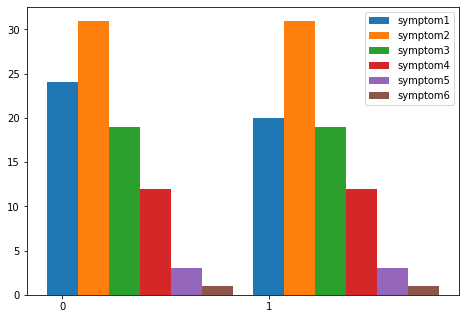

In [26]:
symptoms = ["symptom1",	"symptom2",	"symptom3",	"symptom4",	"symptom5",	"symptom6"]
f = plt.figure()
ax = f.add_axes([0,0,1,1])
#f, axes = plt.subplots(nrows = 1, ncols = 2, sharey = True)
k = 0
for i in symptoms:
    ax.bar(df['result']+k, df[i], width = 0.15)
    k += 0.15
ax.legend(labels=["symptom1",	"symptom2",	"symptom3",	"symptom4",	"symptom5",	"symptom6"])
ax.set_xticks([0,1]);

plt.show()
